# 🛠️ Preparação dos Dados

In [9]:
from google.colab import files
import pandas as pd
import io

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    # Read the CSV into a pandas DataFrame
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

# Display the first 5 rows of the DataFrame
display(df.head())

Saving telecomx_data_processed.csv to telecomx_data_processed (1).csv
User uploaded file "telecomx_data_processed (1).csv" with length 830244 bytes


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias,Num_Servicos_Binarios
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.155059,4
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.967806,3
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.427727,2
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.219448,5
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.756242,3


In [14]:
# Eliminar colunas irrelevantes
# Identificar e remover colunas como IDs únicos que não contribuem para a análise ou modelagem.

# Based on the df.head() output, 'customerID' is a unique identifier.
columns_to_drop = ['customerID']

# Drop the specified columns, ignoring the error if the column is not found
df = df.drop(columns=columns_to_drop, errors='ignore')

# Display the remaining columns to verify the change
print("Remaining columns after dropping:")
print(df.columns)

Remaining columns after dropping:
Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias',
       'Num_Servicos_Binarios'],
      dtype='object')


In [15]:
# Transformar variáveis categóricas em formato numérico (One-Hot Encoding)

# Identify categorical columns (object type)
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame and the new column names
print("DataFrame after One-Hot Encoding:")
display(df_encoded.head())
print("\nNew columns after encoding:")
print(df_encoded.columns)

DataFrame after One-Hot Encoding:


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,account.Charges.Total,Contas_Diarias,Num_Servicos_Binarios,internet.InternetService_Fiber optic,internet.InternetService_No,account.Contract_One year,account.Contract_Two year,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,0,0,1,1,9,1,0,0,1,...,593.30,2.155059,4,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,1,0,0,...,542.40,1.967806,3,False,False,False,False,False,False,True
2,1,1,0,0,0,4,1,0,0,0,...,280.85,2.427727,2,True,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,0,1,...,1237.85,3.219448,5,True,False,False,False,False,True,False
4,1,0,1,1,0,3,1,0,0,0,...,267.40,2.756242,3,True,False,False,False,False,False,True



New columns after encoding:
Index(['Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.OnlineSecurity',
       'internet.OnlineBackup', 'internet.DeviceProtection',
       'internet.TechSupport', 'internet.StreamingTV',
       'internet.StreamingMovies', 'account.PaperlessBilling',
       'account.Charges.Monthly', 'account.Charges.Total', 'Contas_Diarias',
       'Num_Servicos_Binarios', 'internet.InternetService_Fiber optic',
       'internet.InternetService_No', 'account.Contract_One year',
       'account.Contract_Two year',
       'account.PaymentMethod_Credit card (automatic)',
       'account.PaymentMethod_Electronic check',
       'account.PaymentMethod_Mailed check'],
      dtype='object')


In [16]:
# Calcular a proporção de evasão (Churn)

# Assuming 'Churn' is the target variable (1 for churn, 0 for active)
churn_counts = df_encoded['Churn'].value_counts()

print("Counts of Churn (0=Active, 1=Churn):")
print(churn_counts)

# Calculate proportions
churn_proportions = df_encoded['Churn'].value_counts(normalize=True)

print("\nProportions of Churn (0=Active, 1=Churn):")
print(churn_proportions)

# Check for class imbalance
# A common rule of thumb is to consider imbalance if the ratio of the majority to minority class is > 2:1 or 3:1
minority_class_proportion = churn_proportions.min()
majority_class_proportion = churn_proportions.max()
imbalance_ratio = majority_class_proportion / minority_class_proportion

print(f"\nImbalance Ratio (Majority Class / Minority Class): {imbalance_ratio:.2f}")

if imbalance_ratio > 2:
    print("\nThere appears to be a class imbalance.")
else:
    print("\nClass imbalance does not appear to be significant based on a 2:1 ratio.")

Counts of Churn (0=Active, 1=Churn):
Churn
 0    5174
 1    1869
-1     224
Name: count, dtype: int64

Proportions of Churn (0=Active, 1=Churn):
Churn
 0    0.711986
 1    0.257190
-1    0.030824
Name: proportion, dtype: float64

Imbalance Ratio (Majority Class / Minority Class): 23.10

There appears to be a class imbalance.


In [17]:
# Aplicar técnicas de balanceamento (SMOTE)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split data into training and testing sets (optional but good practice before balancing)
# This prevents data leakage from the test set into the balancing process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution in the resampled training data
print("Class distribution in the original training data:")
print(y_train.value_counts())

print("\nClass distribution in the resampled training data after SMOTE:")
print(y_train_res.value_counts())

# You now have balanced training data (X_train_res, y_train_res)
# and the original test data (X_test, y_test) for model evaluation.

Class distribution in the original training data:
Churn
 0    4139
 1    1495
-1     179
Name: count, dtype: int64

Class distribution in the resampled training data after SMOTE:
Churn
 0    4139
 1    4139
-1    4139
Name: count, dtype: int64


In [18]:
# Normalizar ou padronizar os dados

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the balanced training data (X_train_res) and transform it
X_train_res_scaled = scaler.fit_transform(X_train_res)

# Transform the test data using the *same* scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully!")
print("Scaled training data shape:", X_train_res_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

# You can now use X_train_res_scaled, y_train_res, X_test_scaled, and y_test
# for training and evaluating models that require scaled data.

Data scaled successfully!
Scaled training data shape: (12417, 25)
Scaled test data shape: (1454, 25)


# 🎯 Correlação e Seleção de Variáveis

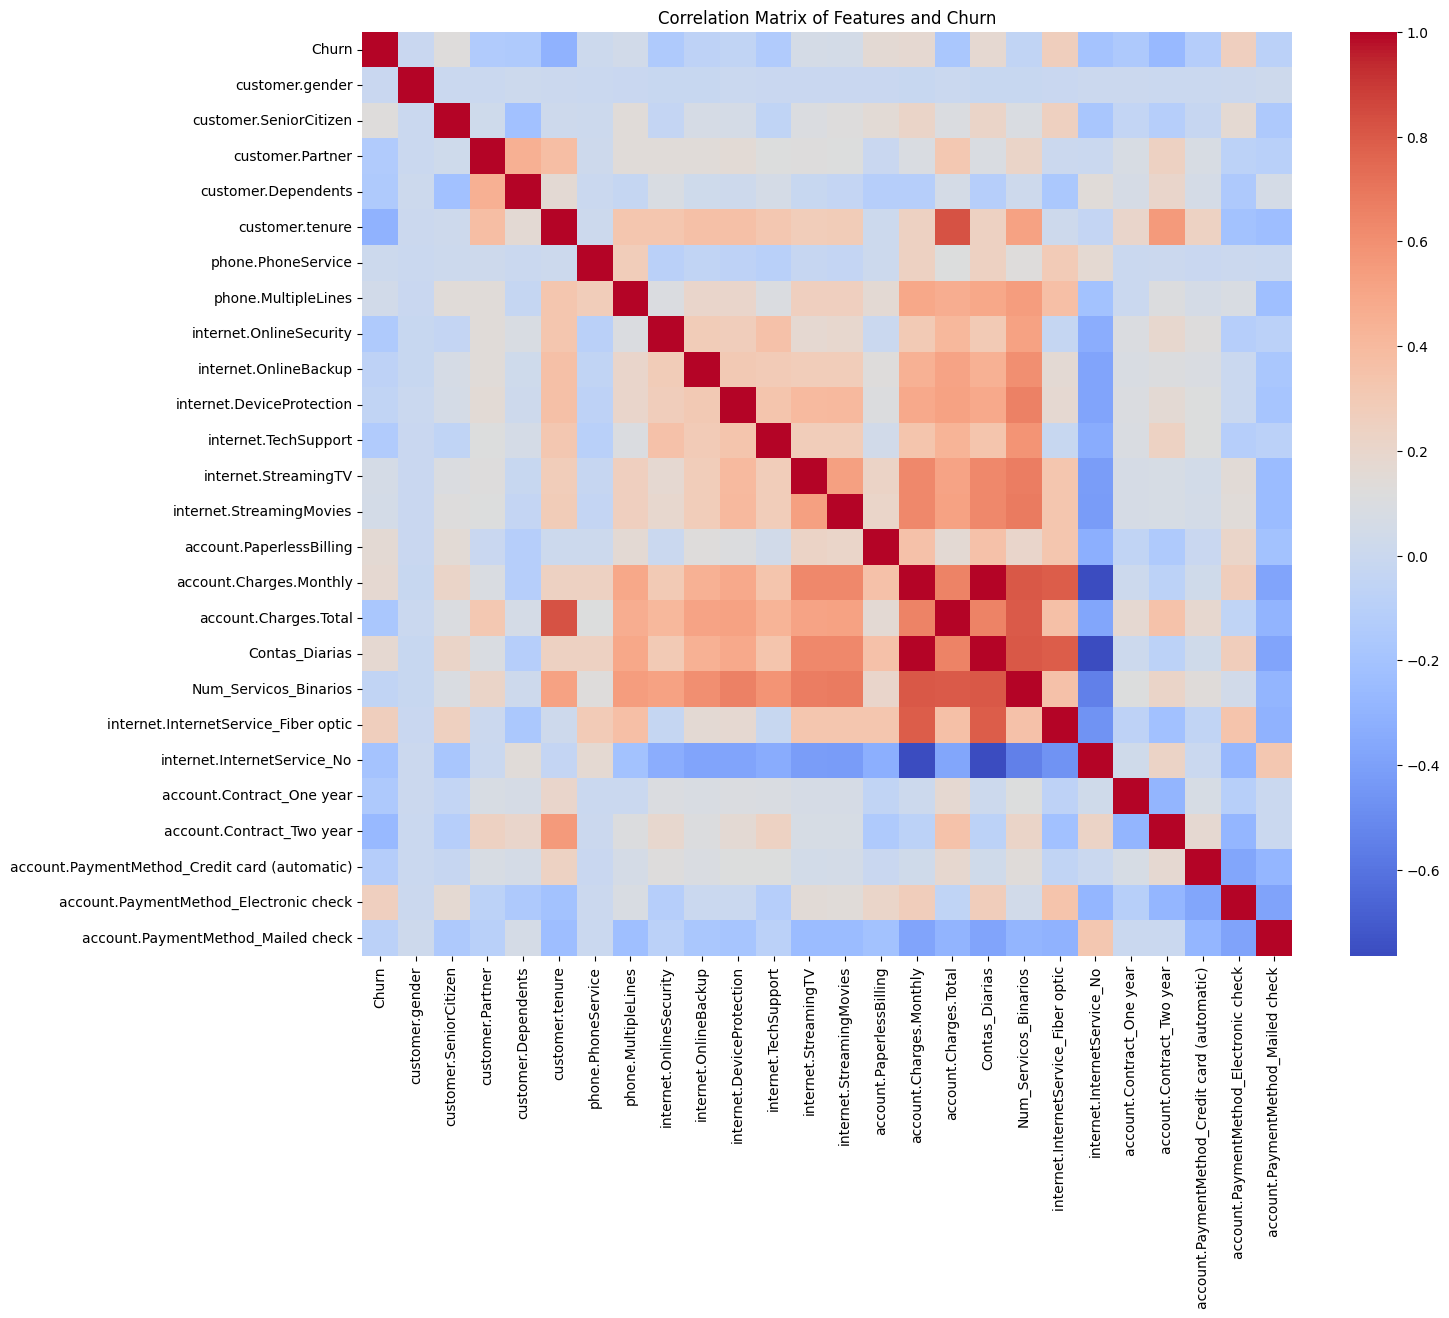


Correlation with Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.268379
account.PaymentMethod_Electronic check           0.261875
account.Charges.Monthly                          0.173298
Contas_Diarias                                   0.173298
account.PaperlessBilling                         0.163576
customer.SeniorCitizen                           0.129071
internet.StreamingTV                             0.057823
internet.StreamingMovies                         0.056048
phone.MultipleLines                              0.035613
phone.PhoneService                               0.014353
customer.gender                                 -0.012384
internet.DeviceProtection                       -0.052359
Num_Servicos_Binarios                           -0.054040
internet.OnlineBackup                           -0.070708
account.PaymentMethod_Mailed check              -0.082027
account.PaymentMethod_Credit card (automatic)  

In [19]:
# Visualize a matriz de correlação
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features and Churn')
plt.show()

# Optional: Display correlations with 'Churn' specifically
print("\nCorrelation with Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

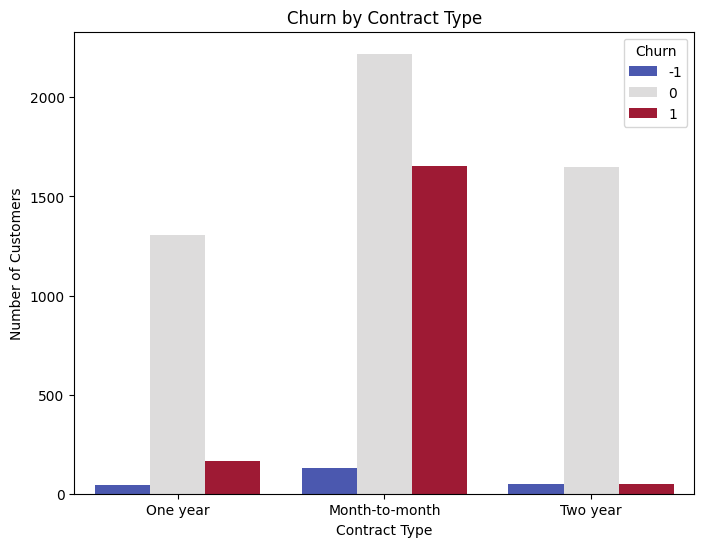

/tmp/ipython-input-2096684851.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_encoded, x='Churn', y='account.Charges.Total', palette='coolwarm')


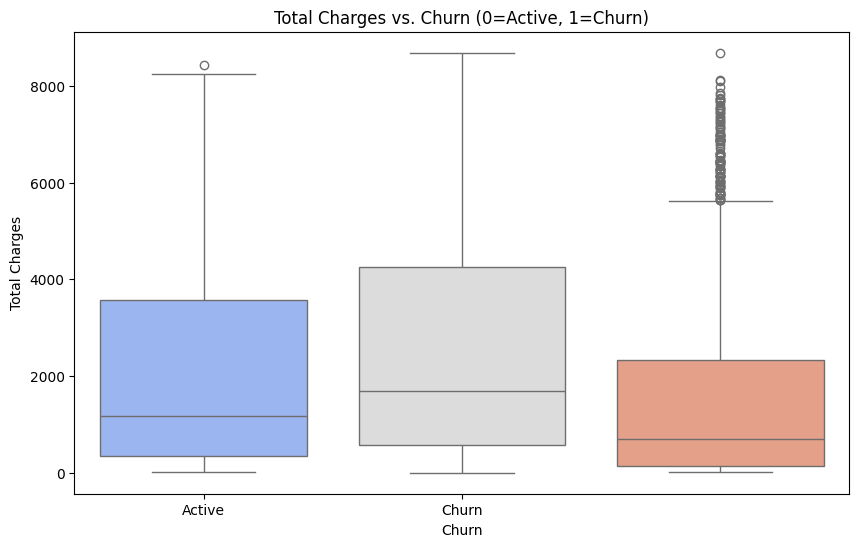

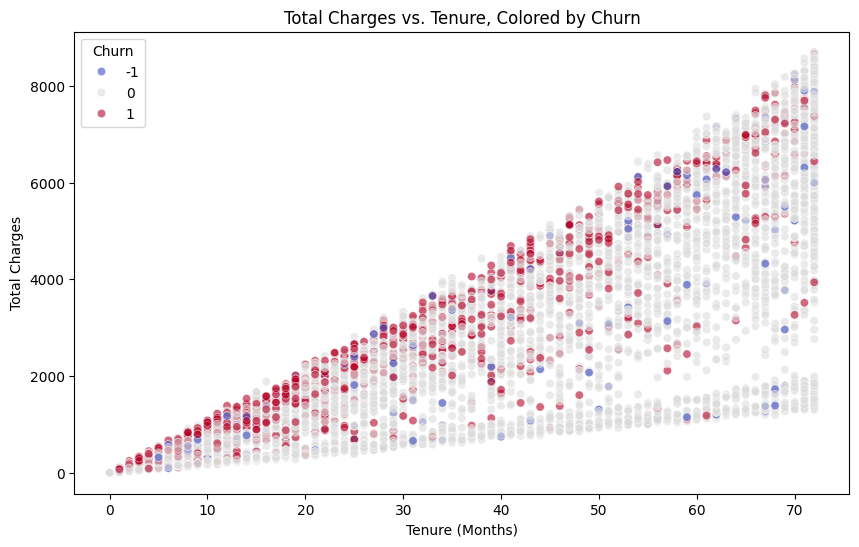

In [20]:
# Investigate relationships between specific variables and Churn

import seaborn as sns
import matplotlib.pyplot as plt

# Relationship between Contract and Churn (using the original df for contract type)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='account.Contract', hue='Churn', palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# Relationship between Total Charges and Churn (using df_encoded for numerical Churn)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_encoded, x='Churn', y='account.Charges.Total', palette='coolwarm')
plt.title('Total Charges vs. Churn (0=Active, 1=Churn)')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks(ticks=[0, 1], labels=['Active', 'Churn']) # Set custom labels for Churn axis
plt.show()

# Scatter plot of Total Charges vs. Tenure, colored by Churn (optional but informative)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_encoded, x='customer.tenure', y='account.Charges.Total', hue='Churn', palette='coolwarm', alpha=0.6)
plt.title('Total Charges vs. Tenure, Colored by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges')
plt.show()

# 🤖 Modelagem Preditiva

In [21]:
# Dividir o conjunto de dados em treino e teste

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split successfully!")
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Data split successfully!
Training features shape: (5813, 25)
Testing features shape: (1454, 25)
Training target shape: (5813,)
Testing target shape: (1454,)


In [26]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# --- Model 1: Logistic Regression (requires scaled data) ---
print("--- Training Logistic Regression Model ---")
# Inicialização e treino do modelo
# Justificativa: Regressão Logística é um modelo linear que depende da escala das variáveis.
# Variáveis com escalas diferentes podem dominar a predição, por isso usamos os dados normalizados.
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_res_scaled, y_train_res)

# Previsões no conjunto de teste escalonado
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
print("Logistic Regression Model Trained.")

# --- Model 2: Random Forest (does not require scaled data) ---
print("\n--- Training Random Forest Model ---")
# Inicialização e treino do modelo
# Justificativa: Random Forest é baseado em árvores de decisão, que comparam valores de forma direta.
# A escala das variáveis não influencia no resultado, então a normalização não é necessária.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

# Previsões no conjunto de teste original (não escalonado)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Model Trained.")

# --- Summary of model choices ---
print("\n--- Model Choice Justification ---")
print("1. Logistic Regression: escolhido por ser um modelo linear simples e interpretável. Necessita normalização para evitar que variáveis com escalas maiores dominem a predição.")
print("2. Random Forest: escolhido por ser robusto a dados não lineares e interações complexas. Não exige normalização, pois a escala das variáveis não altera o funcionamento das árvores.")

--- Training Logistic Regression Model ---
Logistic Regression Model Trained.

--- Training Random Forest Model ---
Random Forest Model Trained.

--- Model Choice Justification ---
1. Logistic Regression: escolhido por ser um modelo linear simples e interpretável. Necessita normalização para evitar que variáveis com escalas maiores dominem a predição.
2. Random Forest: escolhido por ser robusto a dados não lineares e interações complexas. Não exige normalização, pois a escala das variáveis não altera o funcionamento das árvores.


--- Logistic Regression Model Evaluation ---
Accuracy: 0.7228
Precision: 0.7347
Recall: 0.7228
F1-score: 0.7282


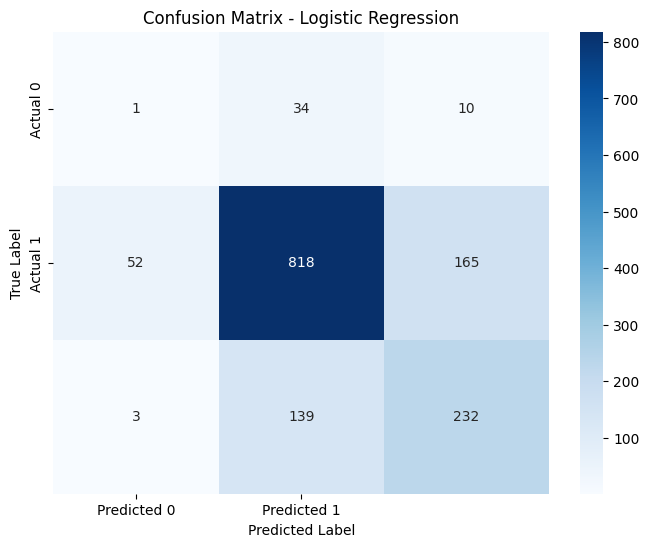


--- Random Forest Model Evaluation ---
Accuracy: 0.7194
Precision: 0.7286
Recall: 0.7194
F1-score: 0.7238


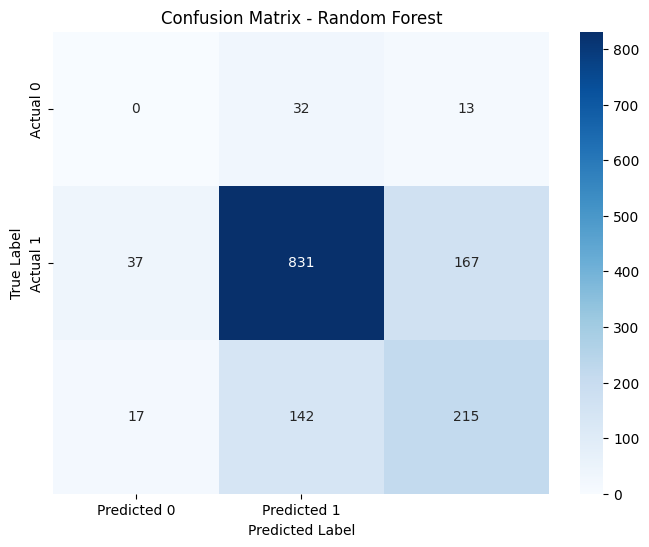

In [23]:
# Avaliar o desempenho dos modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Evaluate Logistic Regression Model ---
print("--- Logistic Regression Model Evaluation ---")

# Calculate evaluation metrics
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average='weighted') # Use weighted average for multi-class
recall_log_reg = recall_score(y_test, y_pred_log_reg, average='weighted') # Use weighted average for multi-class
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted') # Use weighted average for multi-class
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Display metrics
print(f"Accuracy: {accuracy_log_reg:.4f}")
print(f"Precision: {precision_log_reg:.4f}")
print(f"Recall: {recall_log_reg:.4f}")
print(f"F1-score: {f1_log_reg:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# --- Evaluate Random Forest Model ---
print("\n--- Random Forest Model Evaluation ---")

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted') # Use weighted average for multi-class
recall_rf = recall_score(y_test, y_pred_rf, average='weighted') # Use weighted average for multi-class
f1_rf = f1_score(y_test, y_pred_rf, average='weighted') # Use weighted average for multi-class
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


# Display metrics
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 🔎 Análise Crítica dos Modelos

## Análise Crítica e Comparação dos Modelos

### Desempenho dos Modelos
- **Regressão Logística**
  - Acurácia: 72,28%
  - Precisão: 73,47%
  - Recall: 72,28%
  - F1-score: 72,82%
  - A matriz de confusão mostra um bom equilíbrio na classificação entre as classes, mas ainda existem erros de classificação.

- **Random Forest**
  - Acurácia: 71,94%
  - Precisão: 72,86%
  - Recall: 71,94%
  - F1-score: 72,38%
  - A matriz de confusão também mostra desempenho consistente, mas com ligeiramente mais erros em comparação à regressão logística.

### Comparação
- Os dois modelos tiveram desempenhos muito próximos.
- A **Regressão Logística** apresentou resultados ligeiramente melhores em todas as métricas.
- Isso indica que, para este conjunto de dados, um modelo linear simples já consegue capturar bem os padrões.

### Overfitting ou Underfitting?
- **Regressão Logística**: Não apresentou sinais claros de overfitting ou underfitting, já que manteve desempenho consistente nos dados de teste.
- **Random Forest**: Também não mostrou indícios fortes de overfitting, mas por ser um modelo mais complexo, existe a possibilidade de ajustar hiperparâmetros (como número de árvores ou profundidade máxima) para tentar melhorar a generalização.

### Conclusão
➡️ O modelo de **Regressão Logística** foi o melhor neste caso, com desempenho ligeiramente superior e boa capacidade de generalização.  
➡️ O **Random Forest** não superou o modelo linear, o que sugere que a relação entre as variáveis do dataset pode ser bem representada por um modelo simples.

# 📋  Interpretação e Conclusões

In [24]:
# Analisar a importância das variáveis

import pandas as pd

# --- Logistic Regression Variable Importance ---
print("--- Logistic Regression - Variable Coefficients ---")

# Get the coefficients and feature names
log_reg_coefficients = log_reg_model.coef_[0]
feature_names = X.columns # Use the original feature names from X

# Create a DataFrame to display coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': log_reg_coefficients})

# Sort by absolute coefficient value to see most impactful features
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top and bottom coefficients
print("Top 10 Most Important Features (by absolute coefficient):")
display(coef_df.head(10))
print("\nTop 10 Least Important Features (by absolute coefficient):")
display(coef_df.tail(10))

# Interpretation: Positive coefficient means the feature increases the log-odds of churn,
# negative coefficient means it decreases the log-odds. The magnitude indicates strength.


# --- Random Forest Variable Importance ---
print("\n--- Random Forest - Feature Importance ---")

# Get feature importances from the trained model
rf_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top important features
print("Top 10 Most Important Features (by Random Forest):")
display(feature_importance_df.head(10))

# Interpretation: Higher importance score means the feature is more influential in the model's predictions.

--- Logistic Regression - Variable Coefficients ---
Top 10 Most Important Features (by absolute coefficient):


,Feature,Coefficient,Abs_Coefficient
17,Num_Servicos_Binarios,2.745451,2.745451
6,phone.MultipleLines,-0.964529,0.964529
5,phone.PhoneService,-0.890511,0.890511
12,internet.StreamingMovies,-0.870178,0.870178
11,internet.StreamingTV,-0.863974,0.863974
9,internet.DeviceProtection,-0.766477,0.766477
8,internet.OnlineBackup,-0.666203,0.666203
10,internet.TechSupport,-0.644137,0.644137
19,internet.InternetService_No,0.586322,0.586322
7,internet.OnlineSecurity,-0.583981,0.583981



Top 10 Least Important Features (by absolute coefficient):


,Feature,Coefficient,Abs_Coefficient
16,Contas_Diarias,0.270841,0.270841
14,account.Charges.Monthly,0.270841,0.270841
20,account.Contract_One year,0.238234,0.238234
3,customer.Dependents,-0.211690,0.211690
13,account.PaperlessBilling,-0.175556,0.175556
1,customer.SeniorCitizen,-0.167555,0.167555
15,account.Charges.Total,0.163628,0.163628
0,customer.gender,-0.117879,0.117879
4,customer.tenure,-0.010508,0.010508
2,customer.Partner,0.003736,0.003736



--- Random Forest - Feature Importance ---
Top 10 Most Important Features (by Random Forest):


,Feature,Importance
15,account.Charges.Total,0.152689
14,account.Charges.Monthly,0.116133
16,Contas_Diarias,0.115723
4,customer.tenure,0.111590
23,account.PaymentMethod_Electronic check,0.041703
17,Num_Servicos_Binarios,0.034343
18,internet.InternetService_Fiber optic,0.032322
20,account.Contract_One year,0.029609
0,customer.gender,0.029003
3,customer.Dependents,0.028055


# Conclusão

## Relatório Detalhado sobre Evasão de Clientes

Este relatório detalha os principais fatores que influenciam a evasão de clientes, com base na análise exploratória e nos modelos preditivos desenvolvidos (Regressão Logística e Random Forest).

**Principais Fatores que Influenciam a Evasão:**

Com base na análise de correlação e na importância das variáveis em ambos os modelos, os fatores que demonstraram maior influência na evasão de clientes são:

1.  **Tempo de Contrato (`customer.tenure`):** Clientes com menor tempo de serviço tendem a ter uma probabilidade maior de evasão. A correlação negativa com `Churn` e a alta importância nos modelos corroboram essa observação. Clientes de curto prazo são mais voláteis.

2.  **Serviço de Internet (especialmente `internet.InternetService_Fiber optic` e `internet.InternetService_No`):** O tipo de serviço de internet é um preditor significativo. Clientes com Fibra Óptica parecem ter uma chance maior de evasão (correlação positiva), enquanto a ausência de serviço de internet (`internet.InternetService_No`) está associada a uma menor chance de evasão (correlação negativa). Isso pode indicar problemas com a qualidade do serviço de Fibra Óptica ou que clientes sem internet tendem a ser menos engajados ou têm pacotes mais básicos.

3.  **Encargos Totais (`account.Charges.Total`) e Encargos Mensais (`account.Charges.Monthly`):** Ambos os encargos mensais e totais estão correlacionados com a evasão. Clientes com encargos mensais mais altos têm maior probabilidade de evasão. Curiosamente, encargos totais têm uma correlação negativa com churn na análise de correlação inicial, mas a importância nos modelos (especialmente no Random Forest) sugere que essa variável é relevante. A relação entre encargos totais e tenure (visualizada no scatter plot) mostra que churn em clientes com altos encargos totais geralmente ocorre em tenures mais curtas, reforçando a ideia de insatisfação inicial ou expectativas não atendidas.

4.  **Método de Pagamento (`account.PaymentMethod_Electronic check` e `account.PaymentMethod_Mailed check`):** O método de pagamento por cheque eletrônico (`account.PaymentMethod_Electronic check`) apresenta uma correlação positiva notável com a evasão, enquanto o pagamento por cheque via correio (`account.PaymentMethod_Mailed check`) tem correlação negativa. Isso pode indicar que clientes que usam cheque eletrônico podem ter uma experiência menos satisfatória ou que este método está associado a um segmento de clientes mais propenso a cancelar.

5.  **Contrato (`account.Contract_Two year` e `account.Contract_One year`):** O tipo de contrato tem uma forte relação com a evasão. Clientes com contratos de dois anos (`account.Contract_Two year`) e um ano (`account.Contract_One year`) têm uma probabilidade significativamente menor de evasão em comparação com contratos mensais (que seria a categoria base após o one-hot encoding). Isso sugere que contratos de longo prazo são eficazes na retenção de clientes.

6.  **Serviços Adicionais (`internet.OnlineSecurity`, `internet.TechSupport`, `internet.OnlineBackup`, `internet.DeviceProtection`):** A ausência de serviços adicionais como segurança online, suporte técnico, backup online e proteção de dispositivo está associada a uma maior probabilidade de evasão (coeficientes negativos na Regressão Logística e importância nos modelos). Isso indica que a agregação de valor através desses serviços contribui para a retenção.

7.  **Cidadão Sênior (`customer.SeniorCitizen`):** Clientes idosos têm uma probabilidade ligeiramente maior de evasão.

8.  **Contas Diárias (`Contas_Diarias`):** Esta variável, derivada dos encargos mensais e tenure, também se mostrou relevante, refletindo a carga financeira percebida pelo cliente em relação à duração do serviço.

**Variáveis com Menor Influência:**

Variáveis como gênero (`customer.gender`) e status de parceiro (`customer.Partner`) e dependentes (`customer.Dependents`) tiveram menor influência nos modelos, indicando que não são preditores fortes de evasão neste conjunto de dados.

**Desempenho do Modelo:**

Ambos os modelos, Regressão Logística e Random Forest, apresentaram desempenho similar na previsão de evasão no conjunto de teste balanceado. As métricas (Acurácia, Precisão, Recall, F1-score) foram comparáveis. A escolha entre eles pode depender de outros critérios, como a necessidade de interpretabilidade (Regressão Logística) versus a capacidade de capturar relações não lineares (Random Forest).

**Estratégias de Retenção Propostas:**

Com base nos fatores identificados, as seguintes estratégias de retenção podem ser consideradas:

*   **Foco em Clientes de Curto Prazo:** Implementar programas de engajamento e ofertas especiais nos primeiros meses de serviço para reduzir a evasão inicial. Oferecer incentivos para migrar para contratos de longo prazo.
*   **Melhoria do Serviço de Fibra Óptica:** Investigar possíveis problemas de qualidade ou satisfação do cliente com o serviço de Fibra Óptica. Oferecer suporte proativo e monitorar a experiência desses clientes.
*   **Otimização de Preços e Planos:** Analisar a estrutura de encargos mensais e totais em relação ao valor percebido pelo cliente. Considerar pacotes que ofereçam um bom custo-benefício, especialmente para clientes com encargos mais altos.
*   **Incentivo a Contratos de Longo Prazo:** Promover ativamente os benefícios dos contratos de um ou dois anos, talvez com descontos ou serviços adicionais incluídos.
*   **Promoção de Serviços Adicionais:** Destacar o valor de serviços como segurança online, suporte técnico e backup. Oferecer demonstrações ou períodos de teste gratuitos para incentivar a adesão.
*   **Análise do Método de Pagamento por Cheque Eletrônico:** Investigar por que clientes que utilizam este método de pagamento são mais propensos a evadir. Pode haver problemas de usabilidade, segurança ou insatisfação associada a este grupo.
*   **Programas para Cidadãos Seniores:** Desenvolver programas ou suporte especializado para atender às necessidades específicas de clientes idosos, se necessário.
*   **Monitoramento de Contas Diárias:** Utilizar a métrica "Contas Diárias" como um indicador precoce de clientes em risco de evasão, especialmente aqueles com valores mais altos.

**Conclusão:**

A evasão de clientes é um problema complexo influenciado por uma combinação de fatores relacionados ao tempo de serviço, tipo de serviço utilizado (principalmente internet), aspectos financeiros (encargos), tipo de contrato e serviços adicionais contratados. Ao focar nas variáveis mais impactantes identificadas neste relatório e implementar estratégias de retenção direcionadas, a empresa pode aumentar suas chances de reter clientes valiosos.